
# Cyprus GPD per capita


In [107]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import os

%matplotlib inline
os.chdir('I:\dev\ml-scikit-learn_tensor-flow\datasets\housing')

## Functions


In [96]:
def load_housing_data():
    return pd.read_csv('housing.csv')

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [97]:

housing = load_housing_data()



## Housing Head

In [98]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Housing Describe

In [99]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x170B4FF0>,
      dtype=object)

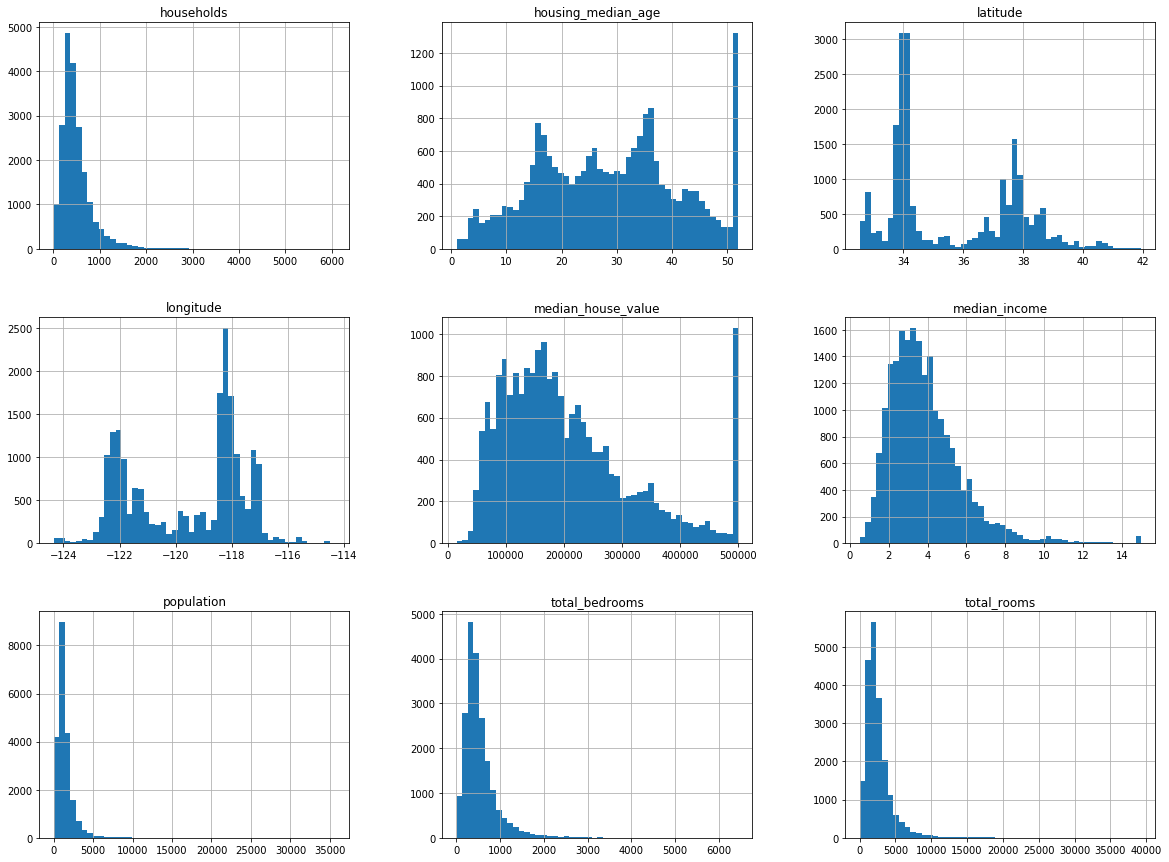

In [100]:
housing.hist(bins=50,figsize=(20,15))


## Splitting Data to Train and Test sets

### Train Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17B4A550>,
      dtype=object)

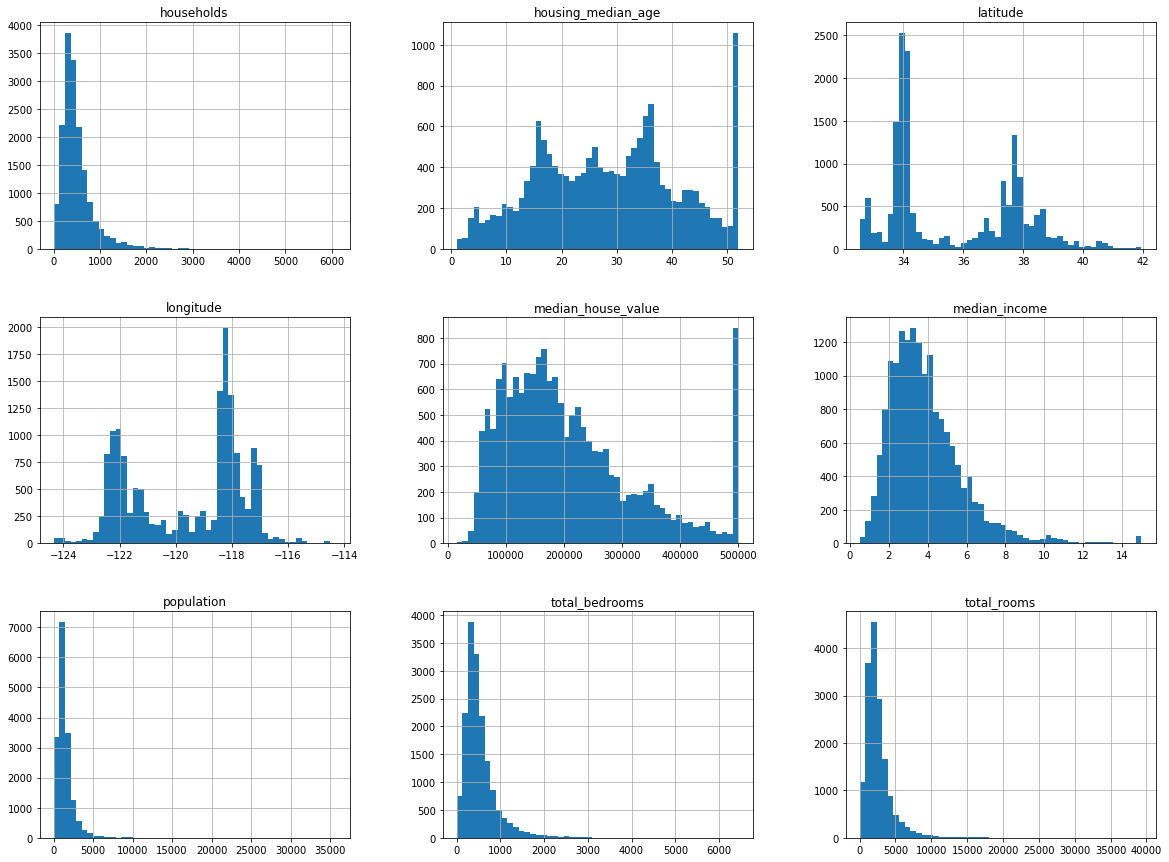

In [102]:
train_set, test_set = train_test_split(housing,test_size=.2,random_state=42)
len(train_set)
train_set.hist(bins=50,figsize=(20,15))


### Test Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x183A0BB0>,
      dtype=object)

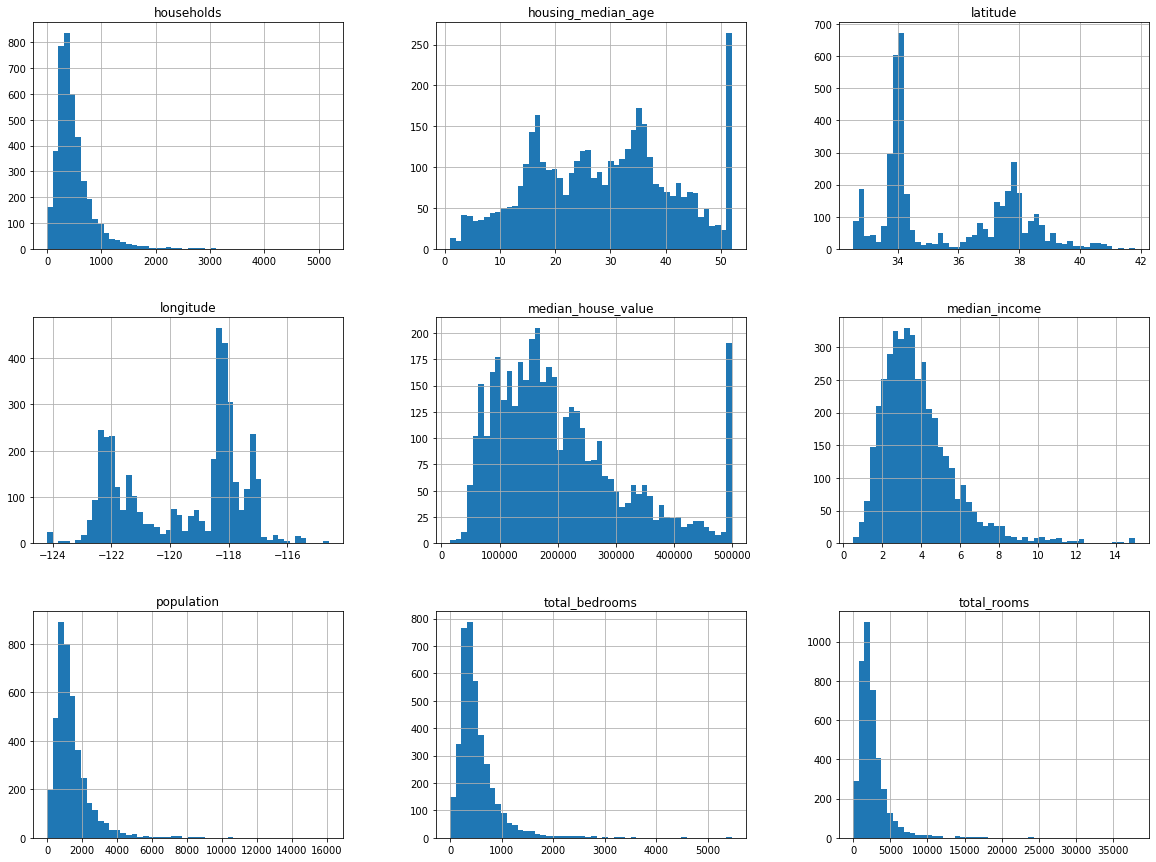

In [103]:
len(test_set)
test_set.hist(bins=50,figsize=(20,15))

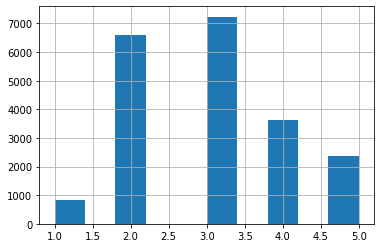

In [105]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0.,1.5,3,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [108]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x18BF5870>,
      dtype=object)

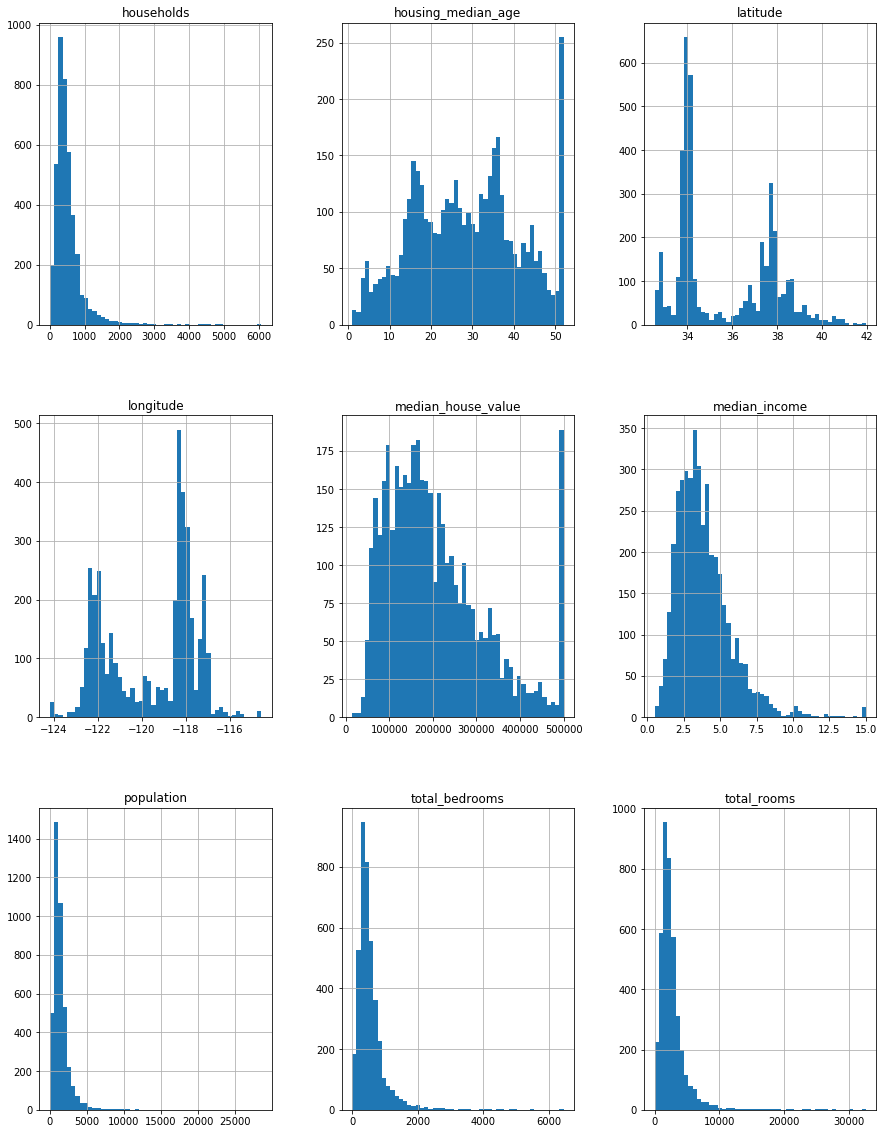

In [109]:
strat_test_set.hist(bins=50,figsize=(15,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x19132B70>,
      dtype=object)

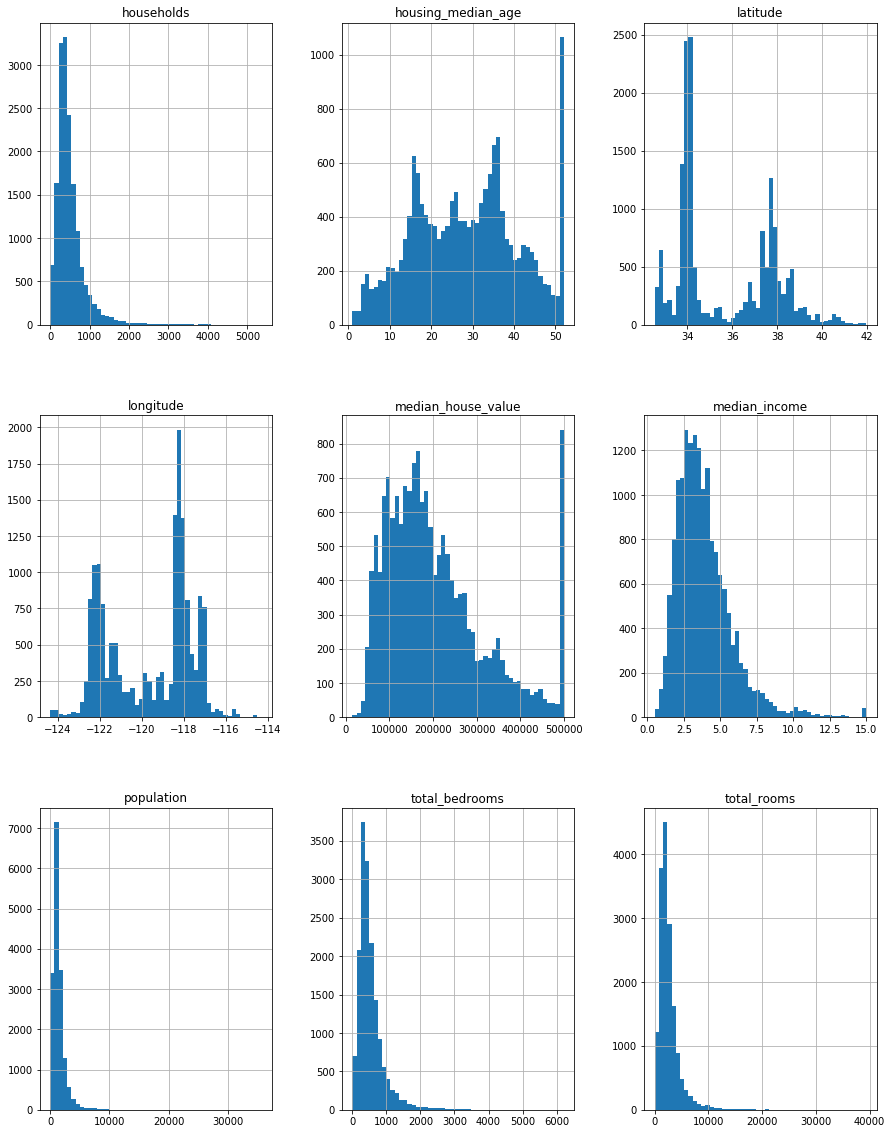

In [110]:
strat_train_set.hist(bins=50,figsize=(15,20))

In [111]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [112]:

housing = strat_train_set.copy()

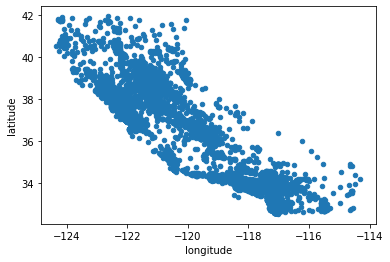

In [113]:
housing.plot(kind='scatter',x='longitude',y='latitude')


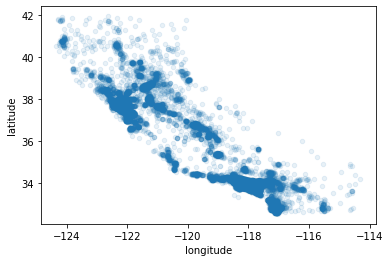

In [114]:

housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

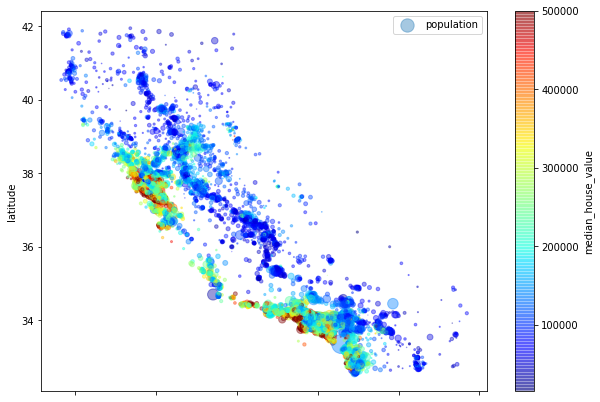

In [115]:

housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.4,
    s=housing['population']/100,
    label='population',
    figsize=(10,7),
    c='median_house_value',
    cmap='jet',
    colorbar=True,
)
plt.legend()
